# Dimensional Reduction - Principal Component Analysis (PCA)

## Tutorial on PCA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#would be great to plot the points in 3D
#from mpl_toolkits.mplot3d import Axes3D

In [10]:
def x_spring(t,A,T):
    return A*np.cos(((2*np.pi)/T)*t)
t = np.linspace(0,60,100)
A, T = 1, 15 #amplitude, period
mu, sigma = 0, 0.1 #noise mean and std
x_0 = x_spring(t,A,T) + np.random.normal(mu,sigma,len(t))
y_0 = np.random.normal(mu,sigma,len(t))
z_0 = np.random.normal(mu,sigma,len(t))
camangles_1 = [23,22,30] #R_x, R_y, and R_z
camangles_2 = [33,90,30]
camangles_3 = [21,180,21]


def rot_x(theta,x,y,z):
    X,Y,Z = x, y*np.cos(theta) - z*np.sin(theta), y*np.sin(theta) + z*np.cos(theta)    
    return [X,Y,Z]
    
def rot_y(theta,x,y,z):
    X = x*np.cos(theta) + z*np.sin(theta)
    Y = y
    Z = -x*np.sin(theta) + z*np.cos(theta)
    return [X,Y,Z]
    
def rot_z(theta,x,y,z):
    X = x*np.cos(theta) - y*np.sin(theta)
    Y = x*np.sin(theta) + y*np.sin(theta)
    Z = z
    return [X,Y,Z]

def get_cam_points(cam_angles,pos_ini):
    fig, axes = plt.subplots(1,4,figsize=(14,5))
    
    x = pos_ini[0]
    y = pos_ini[1]
    z = pos_ini[2]
    
    axes[0].scatter(x,y)
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].set_xlim(-1,1)
    axes[0].set_ylim(-1,1)
    
    new_pos_z = rot_z(cam_angles[0]*(np.pi/180),x,y,z)
    axes[1].scatter(new_pos_z[0],new_pos_z[1])
    axes[1].set_title("rot around Z: " + str(cam_angles[0]) + " deg")
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("y")
    axes[1].set_xlim(-1,1)
    axes[1].set_ylim(-1,1)
    
    new_pos_y = rot_y(cam_angles[1]*(np.pi/180),new_pos_z[0],new_pos_z[1],new_pos_z[2])
    axes[2].scatter(new_pos_y[0],new_pos_y[1])
    axes[2].set_title("rot around Y: " + str(cam_angles[1]) + " deg")
    axes[2].set_xlabel("x")
    axes[2].set_ylabel("y")
    axes[2].set_xlim(-1,1)
    axes[2].set_ylim(-1,1)
    
    new_pos_x = rot_x(cam_angles[2]*(np.pi/180),new_pos_y[0],new_pos_y[1],new_pos_y[2])
    axes[3].scatter(new_pos_x[0],new_pos_x[1])
    axes[3].set_title("rot around X: " + str(cam_angles[2]) + " deg")
    axes[3].set_xlabel("x")
    axes[3].set_ylabel("y")
    axes[3].set_xlim(-1,1)
    axes[3].set_ylim(-1,1)
    
    return new_pos_x


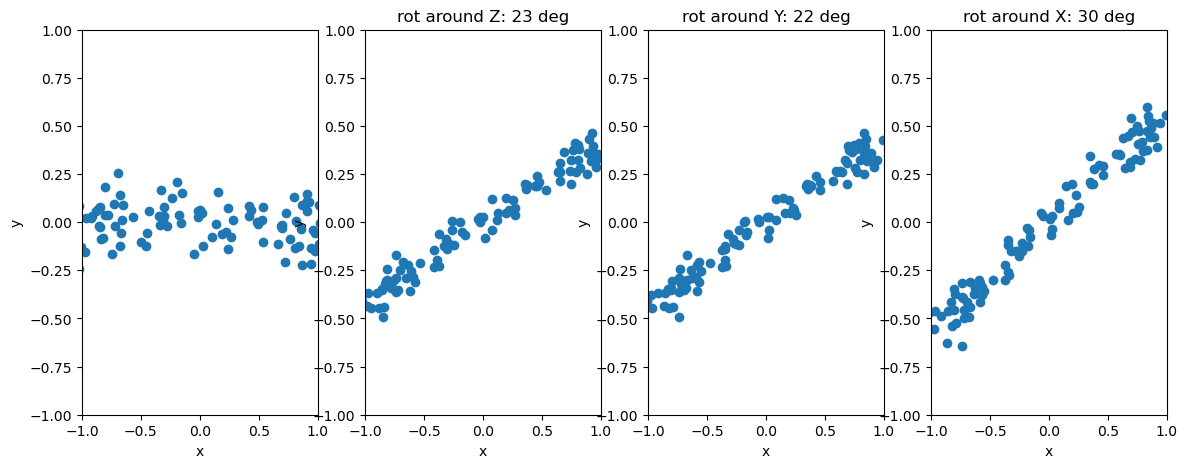

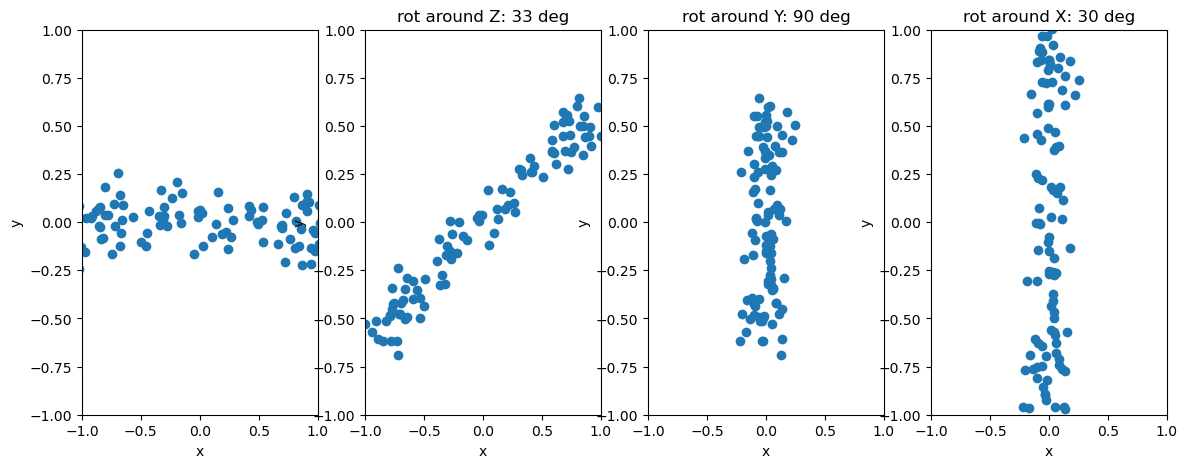

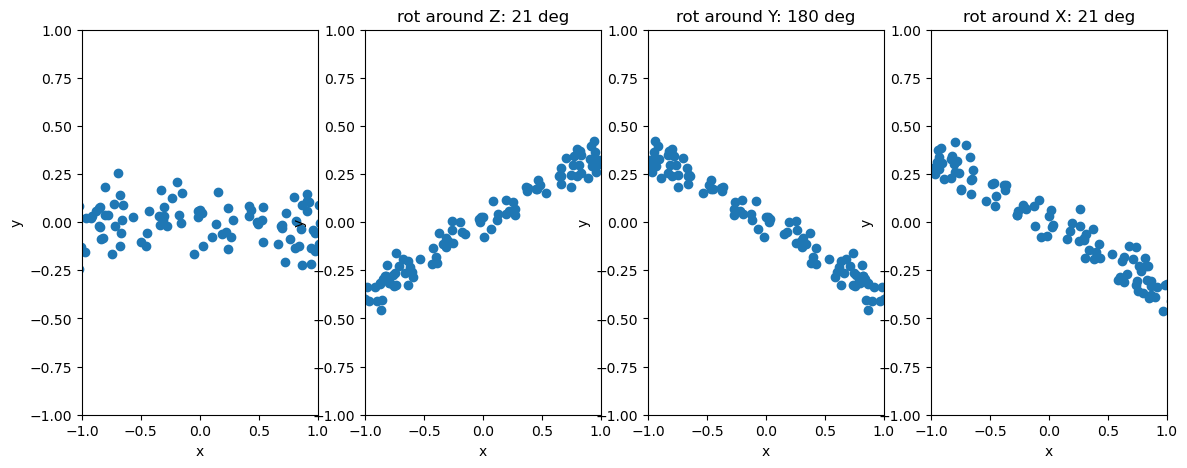

In [11]:
cam_1 = get_cam_points(camangles_1,[x_0,y_0,z_0])
cam_2 = get_cam_points(camangles_2,[x_0,y_0,z_0])
cam_3 = get_cam_points(camangles_3,[x_0,y_0,z_0])

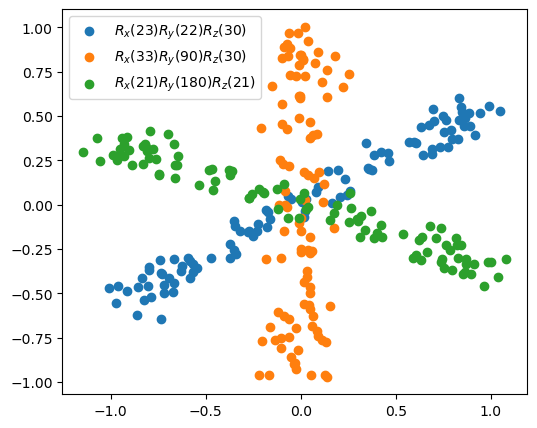

In [12]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(cam_1[0],cam_1[1], label=r"$R_x($"+str(camangles_1[0])+"$)$"+"$R_y($"+str(camangles_1[1])+"$)$"+"$R_z($"+str(camangles_1[2])+"$)$")
ax.scatter(cam_2[0],cam_2[1], label=r"$R_x($"+str(camangles_2[0])+"$)$"+"$R_y($"+str(camangles_2[1])+"$)$"+"$R_z($"+str(camangles_2[2])+"$)$")
ax.scatter(cam_3[0],cam_3[1], label=r"$R_x($"+str(camangles_3[0])+"$)$"+"$R_y($"+str(camangles_3[1])+"$)$"+"$R_z($"+str(camangles_3[2])+"$)$")
ax.legend()

1. Stack each time sample such that we have a matrix $\mathbf{X}$ with each row being data points along a camera axis.

In [ ]:
X = np.vstack([cam_1[:-1],cam_2[:-1],cam_3[:-1]]) #leave out z coordinate

2. Subtract mean from each measurement type (centering).

In [ ]:
X_center = [x - np.mean(x) for x in X]

3. Calculate the eigenvectors of the covariance matrix, i.e. principal components (PCs) of $\mathbf{X}$.

In [ ]:
eigval, eigvec = np.linalg.eigh(np.cov(X_center)) #eigenvectors as columns
print(eigvec)

[[-0.10331693 -0.21527531  0.67408527  0.3974252   0.25607066 -0.51485165]
 [-0.26476929 -0.70661707 -0.11058547 -0.3839053  -0.42324613 -0.30305087]
 [ 0.12393613 -0.40538776 -0.3522838  -0.1358452   0.82316316 -0.01205087]
 [ 0.71529975  0.21015742  0.02163774 -0.38892793 -0.06697863 -0.53661985]
 [ 0.23538496 -0.22439779  0.62489336 -0.43413631  0.05801269  0.55848727]
 [-0.58034718  0.44214151  0.13533709 -0.58006615  0.26427511 -0.20754235]]


4. Calculate projections of $\mathbf{X}$ along PCs. Rank order PCs according to variance explained (we just reverse sort here, I think it depends on the eigenvalues? not sure...).

In [ ]:
P = eigvec.T
Y = np.matmul(P,X_center)
Y_sorted = Y[::-1]
eigval_sorted = eigval[::-1]

5. Plot the variance explained per PC.

Text(0, 0.5, 'Variance explained')

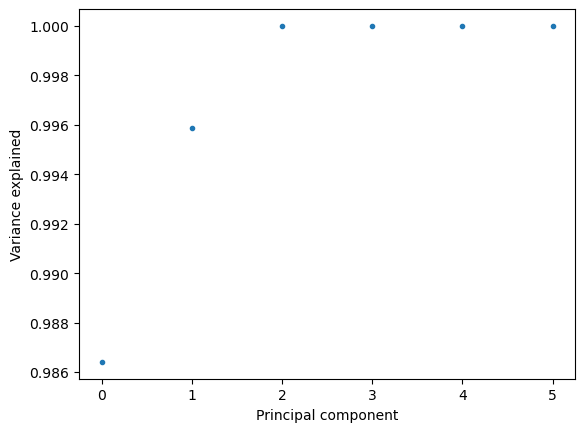

In [ ]:
plt.plot(np.cumsum(eigval_sorted)/eigval.sum(), ls = "None", marker = '.')

plt.xlabel("Principal component")
plt.ylabel("Variance explained")

6. Plotting each PC (just to understand how the variances are explained)

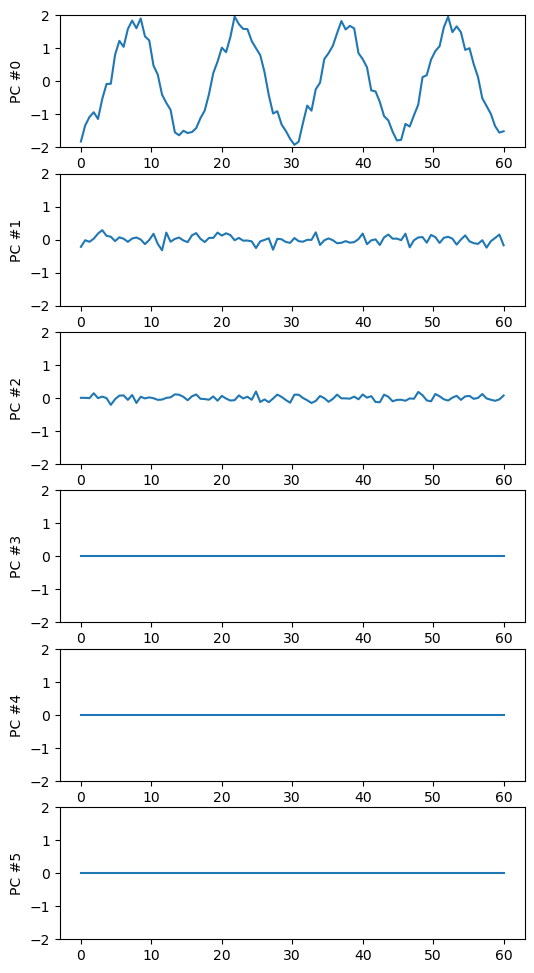

In [ ]:
fig, axs = plt.subplots(P.shape[0], 1, figsize = (6,12))

for i, ax in enumerate(axs):
    ax.plot(t, Y_sorted[i])
    ax.set_ylabel("PC #%s" %i)
    ax.set_ylim(-2,2)

## PCA on Faces Data Set